9. Write a Python program to fuzzify the input variable temperature using Triangular
membership functions for Low, Medium, and High with Input temperature values [10,
20, 30, 40, 50].

In [2]:
import numpy as np
import skfuzzy as fuzz

In [3]:
x_temp = np.arange(0, 61)

In [4]:
temperatures = np.array([10, 20, 30, 40, 50])

In [5]:
low = fuzz.trimf(x_temp, [0, 10, 30])
medium = fuzz.trimf(x_temp, [10, 30, 50])
high = fuzz.trimf(x_temp, [30, 50, 60])

In [6]:
print(f"Membership Degree of temparature in each fuzzy set")
for temp in temperatures:
    low_deg = fuzz.interp_membership(x_temp, low, temp)
    med_deg = fuzz.interp_membership(x_temp, medium, temp)
    high_deg = fuzz.interp_membership(x_temp, high, temp)
    print(f"Temperature: {temp}")
    print(f"  Low:    {low_deg:.2f}")
    print(f"  Medium: {med_deg:.2f}")
    print(f"  High:   {high_deg:.2f}\n")

Membership Degree of temparature in each fuzzy set
Temperature: 10
  Low:    1.00
  Medium: 0.00
  High:   0.00

Temperature: 20
  Low:    0.50
  Medium: 0.50
  High:   0.00

Temperature: 30
  Low:    0.00
  Medium: 1.00
  High:   0.00

Temperature: 40
  Low:    0.00
  Medium: 0.50
  High:   0.50

Temperature: 50
  Low:    0.00
  Medium: 0.00
  High:   1.00



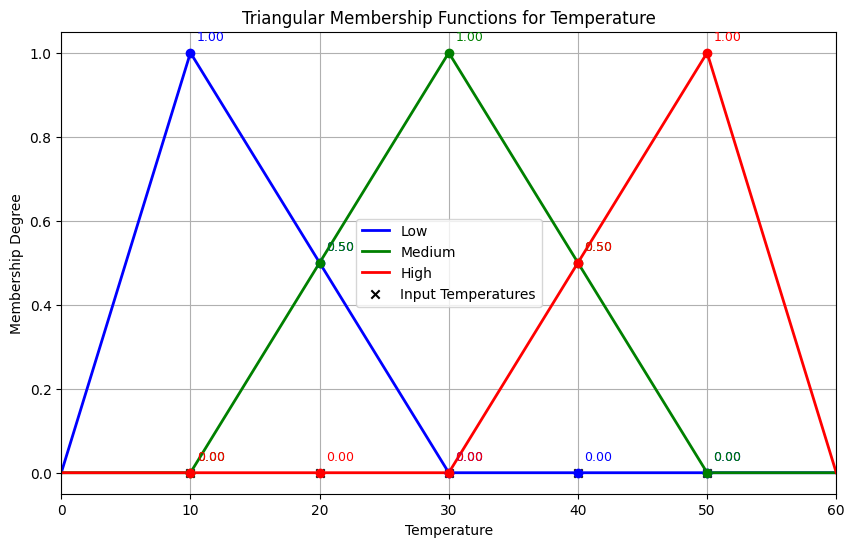

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(x_temp, low, 'b', linewidth=2, label='Low')
plt.plot(x_temp, medium, 'g', linewidth=2, label='Medium')
plt.plot(x_temp, high, 'r', linewidth=2, label='High')

colors = ['b', 'g', 'r']
labels = ['Low', 'Medium', 'High']
for temp in temperatures:
    degs = [
        fuzz.interp_membership(x_temp, low, temp),
        fuzz.interp_membership(x_temp, medium, temp),
        fuzz.interp_membership(x_temp, high, temp)
    ]
    for i, deg in enumerate(degs):
        plt.plot([temp], [deg], marker='o', color=colors[i])
        plt.text(temp+0.5, deg+0.03, f"{deg:.2f}", color=colors[i], fontsize=9)

plt.scatter(temperatures, [0]*len(temperatures), color='k', marker='x', label='Input Temperatures')

plt.title('Triangular Membership Functions for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Membership Degree')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 60)
plt.legend()
plt.grid(True)
plt.show()